In [1]:
from py_vollib_vectorized import vectorized_implied_volatility as implied_vol
import numpy as np
import matplotlib.pyplot as plt
from Heston_Model import heston_method as heston_method

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data Refreshed From Yfinance...
{'model': 'Heston', 'period': '3y', 'simulations': 10000, 'ticker': 'SPY', 'correlation': array([[ 1.        , -0.72295008],
       [-0.72295008,  1.        ]]), 'S0': 417.94000244140625, 'v0': 0.16690000534057617, 'sigma': 0.9903524649222587, 'rf_rate': 0.044630002975463864, 'kappa': 3, 'theta': 0.19877271548643807}


c:\Users\Khyle\miniconda3\envs\ML\Lib\site-packages\py_vollib_vectorized\implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
  below_intrinsic, above_max_price = _check_below_and_above_intrinsic(K, F, flag, undiscounted_option_price, on_error)


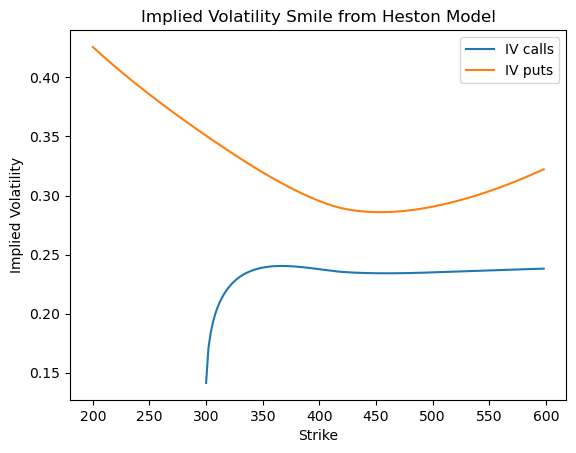

1.5402861744545298
417.94000244140625
200
200
200


In [2]:
np.random.seed(0)
prices, vol = heston_method("SPY", period="3y", simulations=10000)
K = np.arange(200, 600, 2)

puts = np.array([np.exp(-0.045)*np.mean(np.maximum(k-prices,0)) for k in K])
calls = np.array([np.exp(-0.045)*np.mean(np.maximum(prices-k,0)) for k in K])
 
put_ivs = implied_vol(puts, prices[0][0], K, 1, 0.045, flag='p', q=0, return_as='numpy', on_error='ignore')
call_ivs = implied_vol(calls, prices[0][0], K, 1, 0.045, flag='c', q=0, return_as='numpy')

plt.plot(K, call_ivs, label=r'IV calls')
plt.plot(K, put_ivs, label=r'IV puts')

plt.ylabel('Implied Volatility')
plt.xlabel('Strike')
plt.title('Implied Volatility Smile from Heston Model')
plt.legend()
plt.show()

print(puts[0])
print(prices[0][0])
print(len(K))
print(len(call_ivs))
print(len(put_ivs))

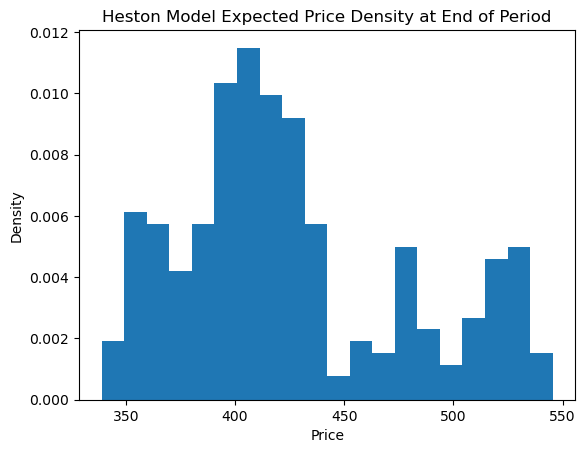

In [3]:
# Since we simulated a bunch of stochastic paths for the stock price, we can see the probablity density function of the stock price at expiration
plt.hist(prices[:,-1], bins=20, density=True)
plt.title('Heston Model Expected Price Density at End of Period')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [4]:
#We can also extrapolate the risk neutral current price given the expected price at end of period
print(np.mean(prices[:,-1])*(1/(1.045**3)))

373.31092127890304
